# "Human or Robot" 
## Predicting Auction Fraud

On an auction website, human bidders are becoming increasingly frustrated with their inability to win auctions vs. their software-controlled counterparts. As a result, usage from the site's core customer base is plummeting. In order to rebuild customer happiness, the site owners need to eliminate computer generated bidding from their auctions.

The goal of this project is to identify online auction bids that are placed by "robots", thus helping the site owners easily flag these users for removal from their site to prevent unfair auction activity.

<img src="../images/robots-greeting.png" width="500">

## FEATURE ENGINEERING

- Number of bids per auction by bidder_id
- Number of countries per bidder_id
- Number of IP addresses per bidder_id
- Number of URLs per bidder_id
- Number of same IP addresses per auction for bidder_id
- Difference in bidding time per bidder_id

Considering:
- Create unique bidder_id using time (year)
- Rearrange merchandise to columns and have values as number of bids for each bidder

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ignore the warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load df
auction_df = pd.read_csv('../large_data/auction_df')
auction_df

,bid_id,auction,merchandise,device,time,country,ip,url,bidder_id,payment_account,address,outcome
0,85371.0,yitr4,home goods,phone35,9.759489e+15,ke,82.34.177.248,vasstdc27m7nks3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,274487.0,btpyy,home goods,phone1004,9.760249e+15,zm,202.130.71.167,vasstdc27m7nks3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
2,527436.0,kj2ko,home goods,phone4,9.762261e+15,ke,22.54.76.225,vasstdc27m7nks3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
3,554135.0,1m5t8,home goods,phone4,9.762431e+15,ke,32.13.237.126,vasstdc27m7nks3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
4,607628.0,btpyy,home goods,phone4,9.762789e+15,ke,202.236.188.240,vasstdc27m7nks3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3071219,609792.0,jefix,mobile,phone316,9.762802e+15,id,28.18.7.49,ar89au37swuzvzz,c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl,a3d2de7675556553a5f08e4c88d2c22856leq,d02c2b288b8aabd79ff47118aff41a2dqwzwc,0.0
3071220,2297899.0,jefix,mobile,phone33,9.772601e+15,id,161.237.171.157,ar89au37swuzvzz,c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl,a3d2de7675556553a5f08e4c88d2c22856leq,d02c2b288b8aabd79ff47118aff41a2dqwzwc,0.0
3071221,3400601.0,jqx39,office equipment,phone11,9.636754e+15,sa,54.212.21.87,cgb17jpn1ixq9hw,0381a69b7a061e9ace2798fd48f1f537mgq57,fd87037ce0304077079c749f420f0b4c54uo0,f030a221726fbcdfc4dc7dfd1b381a112hieq,0.0
3071222,2007255.0,ntjde,jewelry,phone59,9.770756e+15,ru,79.72.96.0,9ov8hm82p20sxlz,84a769adc98498f52debfe57b93a0789556f4,fbe0ce34d6546ebd9e4c63afc68b085byd2tf,a3d2de7675556553a5f08e4c88d2c228fib6p,0.0


### Feature Creation

In [3]:
# number of bids a user made per auction
bids_per_auction = auction_df.groupby(['auction', 'bidder_id']).size()
bids_per_auction = bids_per_auction.to_frame()

# number of countries per user
country_per_user = auction_df.groupby(['country', 'bidder_id']).size()
country_per_user = country_per_user.to_frame()

# number of device per user
device_per_user = auction_df.groupby(['device', 'bidder_id']).size()
device_per_user = device_per_user.to_frame()

# proportion of unique ip addresses to bids per user
ip_bids_per_user = auction_df.groupby('bidder_id')['ip'].nunique()/auction_df.groupby('bidder_id')['bid_id'].nunique()
ip_bids_per_user = ip_bids_per_user.to_frame()

# proportion of unique url addresses to bids per user
url_bids_per_user = auction_df.groupby('bidder_id')['url'].nunique()/auction_df.groupby('bidder_id')['bid_id'].nunique()
url_bids_per_user = url_bids_per_user.to_frame()

# proportion of bots for each country
bots_country = auction_df[auction_df['outcome'] == 1].groupby(
    'country').size()/auction_df.groupby('country').size()
bots_country = bots_country.fillna(0)
bots_country = bots_country.to_frame()

# proportion of bots per device
bots_device = auction_df[auction_df['outcome'] == 1].groupby(
    'device').size()/auction_df.groupby('device').size()
bots_device = bots_device.fillna(0)
bots_device = bots_device.to_frame()


# # bidding time difference per user (bidder_id)
# auction_df = auction_df.sort_values(by=['time'])
# auction_df['timediffs'] = auction_df.groupby('bidder_id')['time'].transform(pd.Series.diff)



In [4]:
# merge the features to auction_df 
auction_df = pd.merge(auction_df, bids_per_auction, on=['auction', 'bidder_id'], how='left')
auction_df = pd.merge(auction_df, country_per_user, on=['country', 'bidder_id'], how='left')
auction_df = pd.merge(auction_df, device_per_user, on=['device', 'bidder_id'], how='left')
auction_df = pd.merge(auction_df, ip_bids_per_user, on='bidder_id', how='left')
auction_df = pd.merge(auction_df, url_bids_per_user, on='bidder_id', how='left')
auction_df = pd.merge(auction_df, bots_country, on='country', how='left')
auction_df = pd.merge(auction_df, bots_device, on='device', how='left')

In [5]:
# update column names
auction_df.columns = ['bids_id', 'auction', 'merchandise', 'device', 'time',
               'country', 'ip', 'url', 'bidder_id', 'payment_account', 'address',
               'outcome', 'bids_per_auction', 'country_per_user', 
                'device_per_user', 'ip_bids_per_user', 'url_bids_per_user', 'bots_country', 
                'bots_device']



In [6]:
# merchandise auction by user
# rearrange merchandise to columns and have values as number of bids for each bidder

In [7]:
# arrange dataset to contain one bidder_id per row

## Visualization
Distribution of each new feature for human and robots

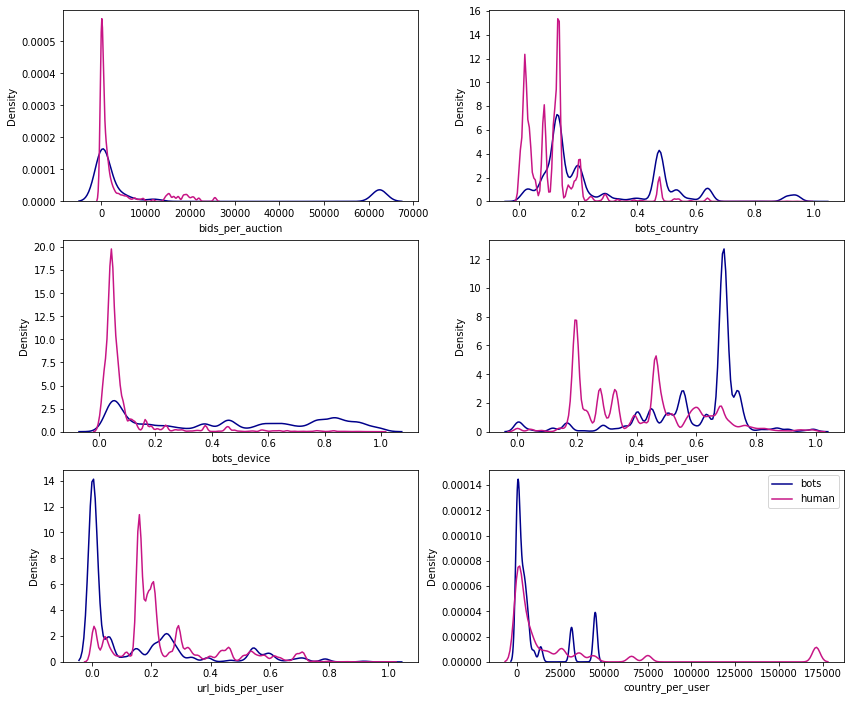

In [8]:
bots = auction_df.loc[auction_df.outcome == 1]
human = auction_df.loc[auction_df.outcome == 0]

fig, axes = plt.subplots(3, 2, figsize=(14, 12), sharex=False)

# bids_per_auction
sns.distplot(bots['bids_per_auction'], hist=False, kde=True,
             bins=int(180/5), color='darkblue',
             kde_kws={'linewidth': 1.5}, ax=axes[0, 0])
sns.distplot(human['bids_per_auction'], hist=False, kde=True,
             bins=int(180/5), color='mediumvioletred',
             kde_kws={'linewidth': 1.5}, ax=axes[0, 0])

# bots_country
sns.distplot(bots['bots_country'], hist=False, kde=True,
             bins=int(180/5), color='darkblue',
             kde_kws={'linewidth': 1.5}, ax=axes[0, 1])
sns.distplot(human['bots_country'], hist=False, kde=True,
             bins=int(180/5), color='mediumvioletred',
             kde_kws={'linewidth': 1.5}, ax=axes[0, 1])

# bots_device
sns.distplot(bots['bots_device'], hist=False, kde=True,
             bins=int(180/5), color='darkblue', label='bots',
             kde_kws={'linewidth': 1.5}, ax=axes[1, 0])
sns.distplot(human['bots_device'], hist=False, kde=True,
             bins=int(180/5), color='mediumvioletred', label='human',
             kde_kws={'linewidth': 1.5}, ax=axes[1, 0])

# ip_bids_per_user
sns.distplot(bots['ip_bids_per_user'], hist=False, kde=True,
             bins=int(180/5), color='darkblue',
             kde_kws={'linewidth': 1.5}, ax=axes[1, 1])
sns.distplot(human['ip_bids_per_user'], hist=False, kde=True,
             bins=int(180/5), color='mediumvioletred',
             kde_kws={'linewidth': 1.5}, ax=axes[1, 1])

# url_bids_per_user
sns.distplot(bots['url_bids_per_user'], hist=False, kde=True,
             bins=int(180/5), color='darkblue',
             kde_kws={'linewidth': 1.5}, ax=axes[2, 0])
sns.distplot(human['url_bids_per_user'], hist=False, kde=True,
             bins=int(180/5), color='mediumvioletred',
             kde_kws={'linewidth': 1.5}, ax=axes[2, 0])

# country_per_user
sns.distplot(bots['country_per_user'], hist=False, kde=True,
             bins=int(180/5), color='darkblue',
             kde_kws={'linewidth': 1.5}, ax=axes[2, 1])
sns.distplot(human['country_per_user'], hist=False, kde=True,
             bins=int(180/5), color='mediumvioletred',
             kde_kws={'linewidth': 1.5}, ax=axes[2, 1])

# # device_per_user
# sns.distplot(bots['device_per_user'], hist=False, kde=True,
#              bins=int(180/5), color='darkblue',
#              kde_kws={'linewidth': 1.5}, ax=axes[2, 1])
# sns.distplot(human['device_per_user'], hist=False, kde=True,
#              bins=int(180/5), color='darkred',
#              kde_kws={'linewidth': 1.5}, ax=axes[2, 1])


plt.legend(['bots', 'human'])
plt.show()

<AxesSubplot:>

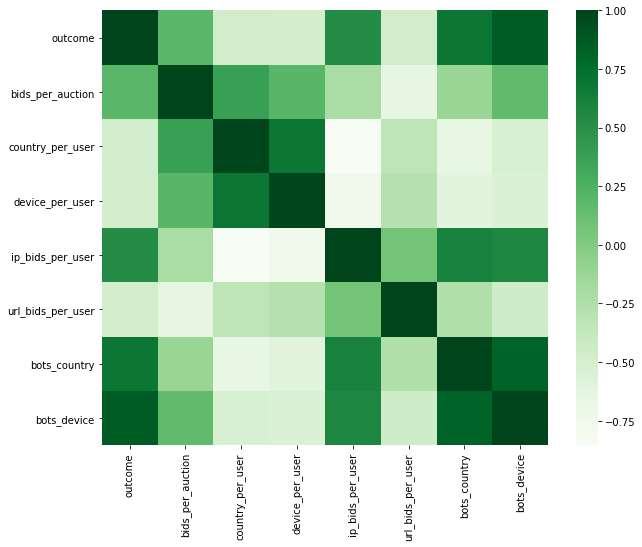

In [9]:
# filter variables of interest
df = auction_df[['outcome', 'bids_per_auction', 'country_per_user', 
                'device_per_user', 'ip_bids_per_user', 'url_bids_per_user', 'bots_country', 
                'bots_device']]

plt.figure(figsize=(10, 8))

# plot the correlation matrix for the numerical values
corr_matrix = df.corr()
sns.heatmap(corr_matrix.corr(),
            xticklabels=corr_matrix.corr().columns,
            yticklabels=corr_matrix.corr().columns,
            cmap="Greens",
            fmt='d')

-------